<div style="display: flex; background-color: RGB(3,190,252);" >
<h1 style="margin: auto; padding: 30px; "> Classification d'images / CNN Keras </h1>
</div>

## Ressource(s)

valisation-set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK                    
train-set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP                       
cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G                         

Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/                                                                           

Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

- Contexte du projet

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.
    1. Mettez en place un système de veille 
    2. Import the Dataset and Preprocess the Data 
    3. Create and Train the Model 
    4. Test the Model and Make Predictions 
    
- Critères de performance

À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.

In [7]:
#Import des packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps, ImageDraw, ImageFont
import cv2 
import PIL
import matplotlib.image as pltimg
import glob 
import os
from os import listdir
# IMPORT POUR ML
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential
#from keras.layers import Dense

## Visualize some images

Nombre de chiens : 2807


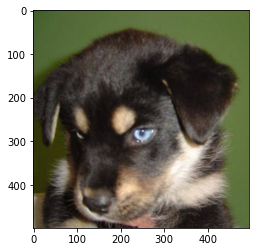

(499, 494, 3)

In [8]:
#Affichage du nombre de chiens
liste_dogs=listdir("datasets/training_set/dogs")
print("Nombre de chiens :", len(liste_dogs))

#Affichage de la derniere image
file = "datasets/training_set/dogs/" + liste_dogs[2806]
image = plt.imread(file)
plt.imshow(image)
plt.show()
image.shape

Nombre de chats : 1029


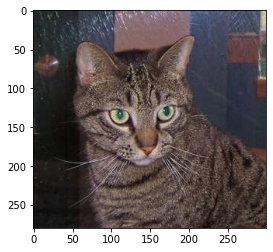

(280, 300, 3)

In [9]:
#Affichage du nombre de chats
from os import listdir
liste_cats=listdir("datasets/training_set/cats")
print("Nombre de chats :",len(liste_cats))

#Affichage de la première image
file0 = "datasets/training_set/cats/" + liste_cats[0]
image = plt.imread(file0)
plt.imshow(image)
plt.show()
image.shape

In [20]:
#Apecu de toutes les images  # Très long à exécuter !!!
for folder_name in ("cats", "dogs"):
    folder_path = os.path.join("datasets/training_set/", folder_name)
    for fname in os.listdir(folder_path):
        img =  cv2.imread("datasets/training_set/{}/{}".format(folder_name,fname))
    
    cv2.imshow(fname,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
        

datasets/training_set/cats
datasets/training_set/cats/cat.1.jpg


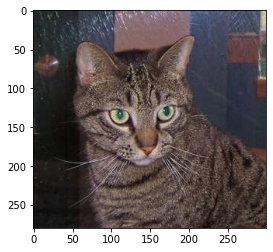

datasets/training_set/cats/cat.100.jpg


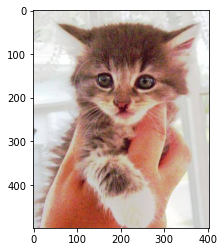

datasets/training_set/cats/cat.1000.jpg


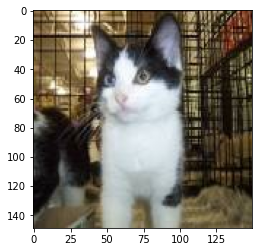

datasets/training_set/cats/cat.1003.jpg


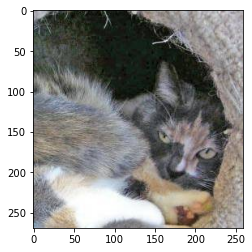

datasets/training_set/cats/cat.101.jpg


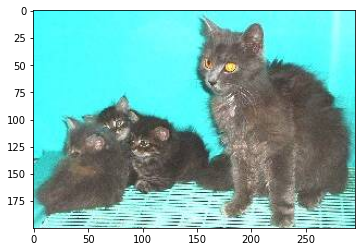

datasets/training_set/dogs
datasets/training_set/dogs/dog.1002.jpg


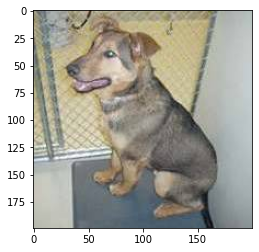

datasets/training_set/dogs/dog.1004.jpg


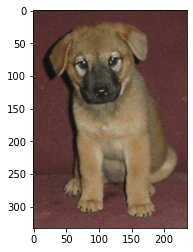

datasets/training_set/dogs/dog.1005.jpg


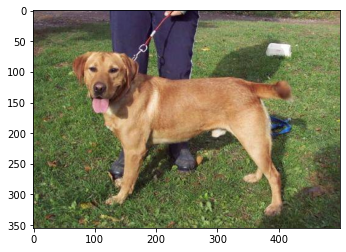

datasets/training_set/dogs/dog.1007.jpg


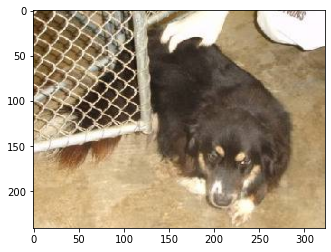

datasets/training_set/dogs/dog.1008.jpg


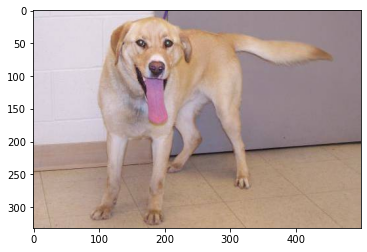

In [15]:
#Affichage des 5 premières images de chaque catégorie
for folder_name in ["cats", "dogs"]:
    folder_path = os.path.join("datasets/training_set/", folder_name)
    for fname in os.listdir(folder_path)[:5]:
        print("datasets/training_set/{}/{}".format(folder_name,fname))
        img =  plt.imread("datasets/training_set/{}/{}".format(folder_name,fname))
        plt.imshow(img)
        plt.show()
       

In [ ]:
Les images ne sont pas tous de la meme taille : je vais donc faire un prprocessing avec keras 

## Preprocessing a Dataset with keras

In [21]:
"""  
image_size = (180, 180)
batch_size = 32

train_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets/training_set",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets/training_set",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
"""

Found 3836 files belonging to 2 classes.
Using 3069 files for training.
Found 3836 files belonging to 2 classes.
Using 767 files for validation.


In [64]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets/training_set_2",
    #validation_split=0.2,
    #subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets/validation_set",
    #validation_split=0.2,
    #subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Visualize the data

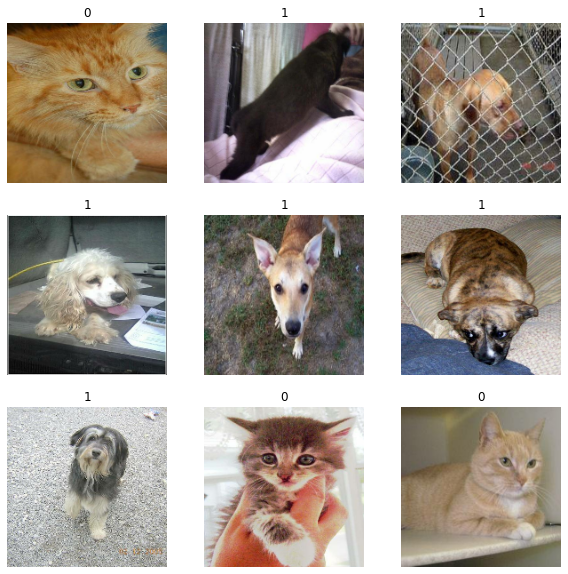

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Using image data augmentation

In [33]:
 

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

# Augmentation non indispensable

##  visualize what the augmented samples looks like 

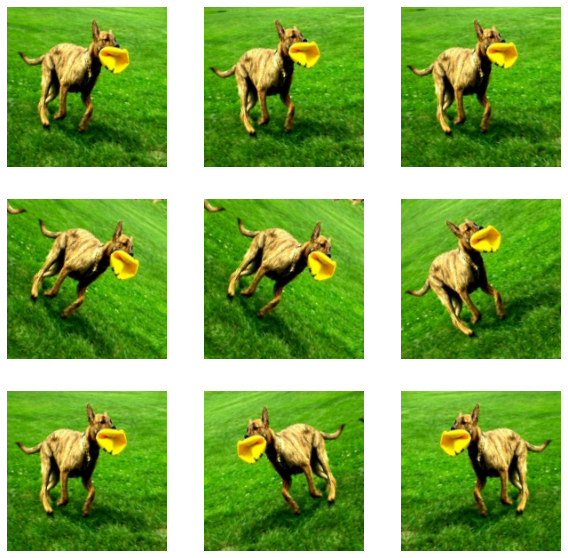

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


## Applying data_augmentation preprocessor

In [39]:
#Option 1: Make it part of the model :

#inputs = keras.Input(shape=input_shape)
#x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)

#Option 2: apply it to the dataset :

#augmented_train_ds = train_ds.map(
   #  lambda x, y: (data_augmentation(x, training=True), y))


## Configure the dataset for performance

In [65]:
#train_ds = train_ds.prefetch(buffer_size=32)
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)


## Build a model

In [66]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Train the model

In [67]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)


Epoch 1/10
250/250 [==============================] - 1446s 6s/step - loss: 0.7001 - accuracy: 0.6026 - val_loss: 0.8855 - val_accuracy: 0.5000
Epoch 2/10
250/250 [==============================] - 1387s 6s/step - loss: 0.5795 - accuracy: 0.7003 - val_loss: 0.8196 - val_accuracy: 0.5040
Epoch 3/10
250/250 [==============================] - 1419s 6s/step - loss: 0.5217 - accuracy: 0.7450 - val_loss: 0.6768 - val_accuracy: 0.6985
Epoch 4/10
250/250 [==============================] - 1418s 6s/step - loss: 0.4618 - accuracy: 0.7810 - val_loss: 0.5062 - val_accuracy: 0.7795
Epoch 5/10
250/250 [==============================] - 1482s 6s/step - loss: 0.4156 - accuracy: 0.8084 - val_loss: 2.0274 - val_accuracy: 0.5685
Epoch 6/10
250/250 [==============================] - 1415s 6s/step - loss: 0.3731 - accuracy: 0.8365 - val_loss: 0.4668 - val_accuracy: 0.7800
Epoch 7/10
250/250 [==============================] - 1569s 6s/step - loss: 0.3498 - accuracy: 0.8456 - val_loss: 0.3208 - val_accuracy:

## Make prediction

In [80]:
img = keras.preprocessing.image.load_img(
    "datasets/aurelie/cat.001_31.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score), 
    "And score is = " , score
)


1/1 [==============================] - 0s 68ms/step
This image is 99.72 percent cat and 0.28 percent dog. And score is =  [0.00280718]


In [69]:
#sateur\Desktop\Classification_images_CNN_Keras\datasets\validation_set\cats

In [ ]:
df pred_class(result):
    if result[0] == 1:
        return chien
    else:
        return chat
    

In [72]:
# saving and loading the .h5 model
 
# ---------------- save model
model.save('model_1.h5')
print('Model Saved!')
 
# ----------------- load model---------------------
#savedModel=load_model('model_1.h5')
#savedModel.summary()

Model Saved!
